# Rising Food Prices and Poverty in Latin America and the Caribbean:
## Effect of Ukrainian invasion

_Lina Arias, Laura Goyeneche; Roberto Sanchez; Luis Tejerina; Eric Torres_

In [1]:
%%capture
%matplotlib inline
from scldata_simulation import * 


In [2]:
# Instantiate simulator 
scldata_simulation = SCLdataSimulation()

/home/ec2-user/SageMaker/Household Socio-Economic Surveys/analytics_simulation_public_policy_scl/notebooks/scldata_simulation.py:37: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  self.harmonized = self.get_harmonized()


In [28]:
# price shock components
shock_component = [#'Alimentos fuera del hogar',
                   #'Azúcares', 'Bebidas no alcohólicas',
                   #'Carnes, aves y huevos',
                   #'Frutas', 
                   'Granos', 'Panes y\ncereales',
                   #'Grasas', 'Leguminosas',
                   #'Lácteos', 
                   #'Productos no especificados previamente', 'Raíces y\ntubérculos', 'Vegetales'
                  ]

# shock_weight
shock_weight = 0.50

# population affected
population = {'sexo_ci': 1}

In [1]:
# Obtener los pesos por canasta

In [17]:
# Get the weight of the shock component
scldata_simulation.get_poverty_lines(shock_component)[['pais_c', 'weight']].drop_duplicates().head(2)

,pais_c,weight
0,ARG,0.170
33,BHS,0.182


## Deltas by Country

In [2]:
# Obtener la armonizada con los deltas por el shock

In [29]:
change = scldata_simulation.simulate_change(shock_component, shock_weight)

In [ ]:
# Obtener los cambios en rates a nivel pais

In [30]:
country_group = scldata_simulation.country_results(change)
#country_group.sort_values('pais_c')

<Figure size 1200x800 with 0 Axes>

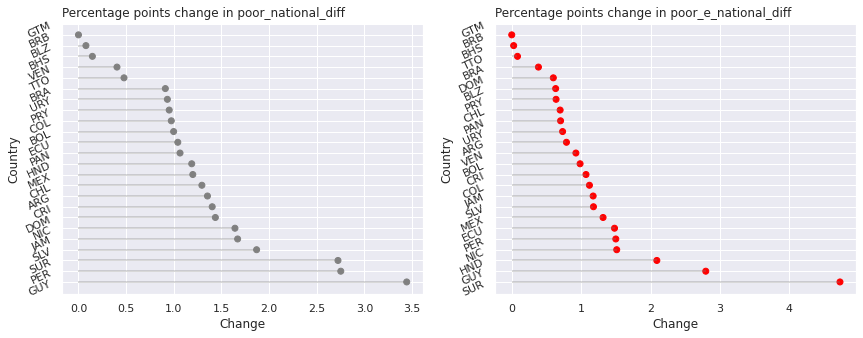

In [24]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
variables = ['poor_national', 'poor_e_national']
for variable in variables:
    country_group[variable +'_diff'] = (country_group[variable + '_delta'] - country_group[variable])*100  
variables = [x + '_diff' for x in variables]
variables.extend(['anio_c', 'pais_c'])
country_group_melt = pd.melt(country_group[variables],id_vars=['anio_c', 'pais_c'],var_name='metrics', value_name='values')

country_group_melt['color'] = np.where(country_group_melt['metrics']=='poor_national_diff', 'grey', 'red')

# Figure by poverty level 
plt.figure(figsize = (22,5))

for i,variable in enumerate(['poor_national_diff', 'poor_e_national_diff']):
    ordered_df = country_group_melt[country_group_melt.metrics==variable]
    ordered_df = ordered_df.sort_values(by=['values'], ascending=False)
    # Subplot
    plt.subplot(1,3,i+1)
    my_range=range(1,len(ordered_df.index)+1)
    plt.hlines(y = my_range, xmin=0, 
               xmax = ordered_df['values'], 
               color ='grey', alpha=0.4)
    plt.scatter(ordered_df['values'], my_range, color=ordered_df.color, alpha=1) 
    plt.yticks(my_range, ordered_df['pais_c'])
    plt.title("Percentage points change in {0}".format(variable), loc='left')
    plt.xlabel('Change')
    plt.ylabel('Country')
    plt.yticks(rotation = 25)
    
plt.show()

## Deltas by Group

<Figure size 3000x800 with 0 Axes>

<Figure size 3000x800 with 0 Axes>

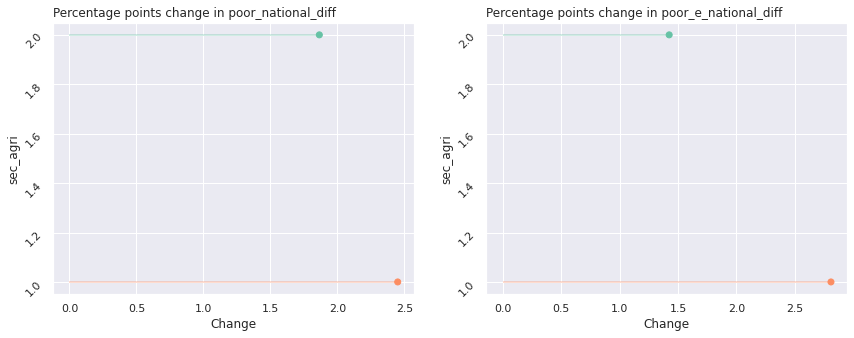

In [42]:
group = ['sec_agri']
plot_group(change, group)

<Figure size 3000x800 with 0 Axes>

<Figure size 3000x800 with 0 Axes>

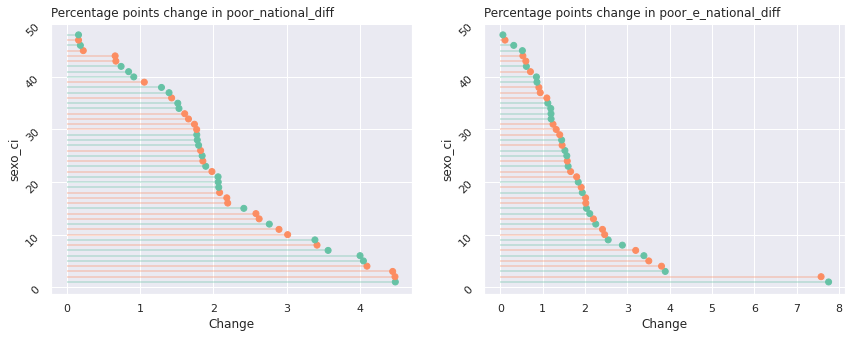

In [34]:
group = ['pais_c', 'sexo_ci']
plot_group(change=change, group= group)